**Precision Fruit Quality Assessment with YOLOv8 and IoT: Optimizing Food Safety**

Accurate fruit quality assessment and early spoilage detection are vital for food safety and reducing supply chain waste. This study presents a framework combining real-time ethylene gas sensing and YOLOv8-based object detection to monitor fruit quality. Ethylene sensors provide immediate data on ripening and spoilage, while object detection classifies fruit images into fresh, mid, or degraded categories. This integrated approach enables automated, continuous monitoring and informed decision-making. The system aims to reduce spoilage, enhance food safety, and improve supply chain efficiency, supporting advancements in precision agriculture and food security.

**Variations of YOLOv8 Models for Object Detection**

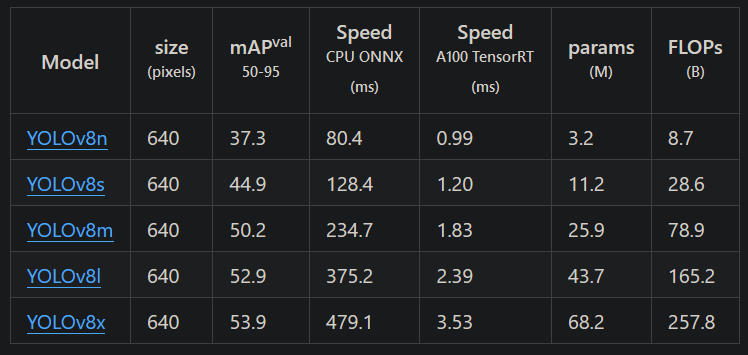

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

**Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. This should be suitable for many users. Preview is available if you want the latest, not fully tested and supported, builds that are generated nightly. Please ensure that you have met the prerequisites below (e.g., numpy), depending on your package manager. You can also install previous versions of PyTorch.**

In [8]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce GTX 1650


In [9]:
from ultralytics import YOLO
import os

In [10]:
YOLO._version

1

In [15]:
model=YOLO("yolov8n.yaml")

**The YOLOv8 model was selected as the cornerstone for model development, owing to its robust performance and versatility. Specifically, the YOLOv8nano variant, optimized for resource-constrained environments, was chosen for its suitability for real-time applications and compatibility with IoT devices. The architecture of YOLOv8nano strikes a delicate balance between model complexity and performance, making it ideal for deployment on edge devices with limited computational resources. The model was trained on a subset of the annotated dataset, comprising 1700 images for training and 100 images for testing. Training was conducted over 300 epochs to ensure convergence and optimal performance.**

In [ ]:
result=model.train(data="config.yaml",epochs=300)

In [27]:
import pandas as pd

# Define the column names as a list of strings
columns = [
    "epoch", "train/box_loss", "train/cls_loss", "train/dfl_loss",
    "metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)",
    "val/box_loss", "val/cls_loss", "val/dfl_loss",
    "lr/pg0", "lr/pg1", "lr/pg2"
]

# Add the last 6 epochs manually as an example (you can extend this with the full 300)
data = [
    [295, 0.84781, 0.52975, 1.3149, 0.91187, 0.89646, 0.95578, 0.75159, 0.84765, 0.50088, 1.2716, 4.73E-05, 4.73E-05, 4.73E-05],
    [296, 0.84364, 0.53448, 1.3113, 0.91494, 0.89252, 0.95539, 0.75183, 0.84785, 0.50096, 1.2717, 4.26E-05, 4.26E-05, 4.26E-05],
    [297, 0.84211, 0.52963, 1.3094, 0.91433, 0.89483, 0.95541, 0.75255, 0.84673, 0.50119, 1.2708, 3.79E-05, 3.79E-05, 3.79E-05],
    [298, 0.83978, 0.53315, 1.3041, 0.91669, 0.89092, 0.95571, 0.75306, 0.84584, 0.50153, 1.2702, 3.32E-05, 3.32E-05, 3.32E-05],
    [299, 0.84536, 0.53331, 1.3126, 0.91553, 0.89290, 0.95580, 0.75343, 0.84501, 0.50150, 1.2694, 2.84E-05, 2.84E-05, 2.84E-05],
    [300, 0.84341, 0.52730, 1.3042, 0.91561, 0.89285, 0.95584, 0.75355, 0.84468, 0.50113, 1.2690, 2.37E-05, 2.37E-05, 2.37E-05],
]

# Create the DataFrame
df_last_epochs = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df_last_epochs


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,295,0.84781,0.52975,1.3149,0.91187,0.89646,0.95578,0.75159,0.84765,0.50088,1.2716,0.000047,0.000047,0.000047
1,296,0.84364,0.53448,1.3113,0.91494,0.89252,0.95539,0.75183,0.84785,0.50096,1.2717,0.000043,0.000043,0.000043
2,297,0.84211,0.52963,1.3094,0.91433,0.89483,0.95541,0.75255,0.84673,0.50119,1.2708,0.000038,0.000038,0.000038
3,298,0.83978,0.53315,1.3041,0.91669,0.89092,0.95571,0.75306,0.84584,0.50153,1.2702,0.000033,0.000033,0.000033
4,299,0.84536,0.53331,1.3126,0.91553,0.89290,0.95580,0.75343,0.84501,0.50150,1.2694,0.000028,0.000028,0.000028
5,300,0.84341,0.52730,1.3042,0.91561,0.89285,0.95584,0.75355,0.84468,0.50113,1.2690,0.000024,0.000024,0.000024


The YOLOv8nano model employs a convolutional neural network (CNN) architecture to perform object detection tasks with exceptional speed and accuracy. At its core, YOLOv8nano utilizes a single neural network to simultaneously predict bounding boxes and class probabilities for multiple objects within an image. The model divides the input image into a grid of cells and predicts bounding boxes and confidence scores for each cell. The confidence score reflects the model's confidence in the presence of an object within the bounding box, while the class probabilities indicate the likelihood of the object belonging to a specific category (i.e., Fresh, Mid, or Rotten).

The YOLOv8nano model leverages feature extraction layers, including convolutional and pooling layers, to capture hierarchical representations of the input image. These representations enable the model to discern intricate patterns and features indicative of fruit ripeness, such as colour variations, texture, and shape distortions. By iteratively refining its predictions through backpropagation and gradient descent, the model learns to accurately localize and classify fruits and vegetables in real-time, facilitating precise quality assessment.


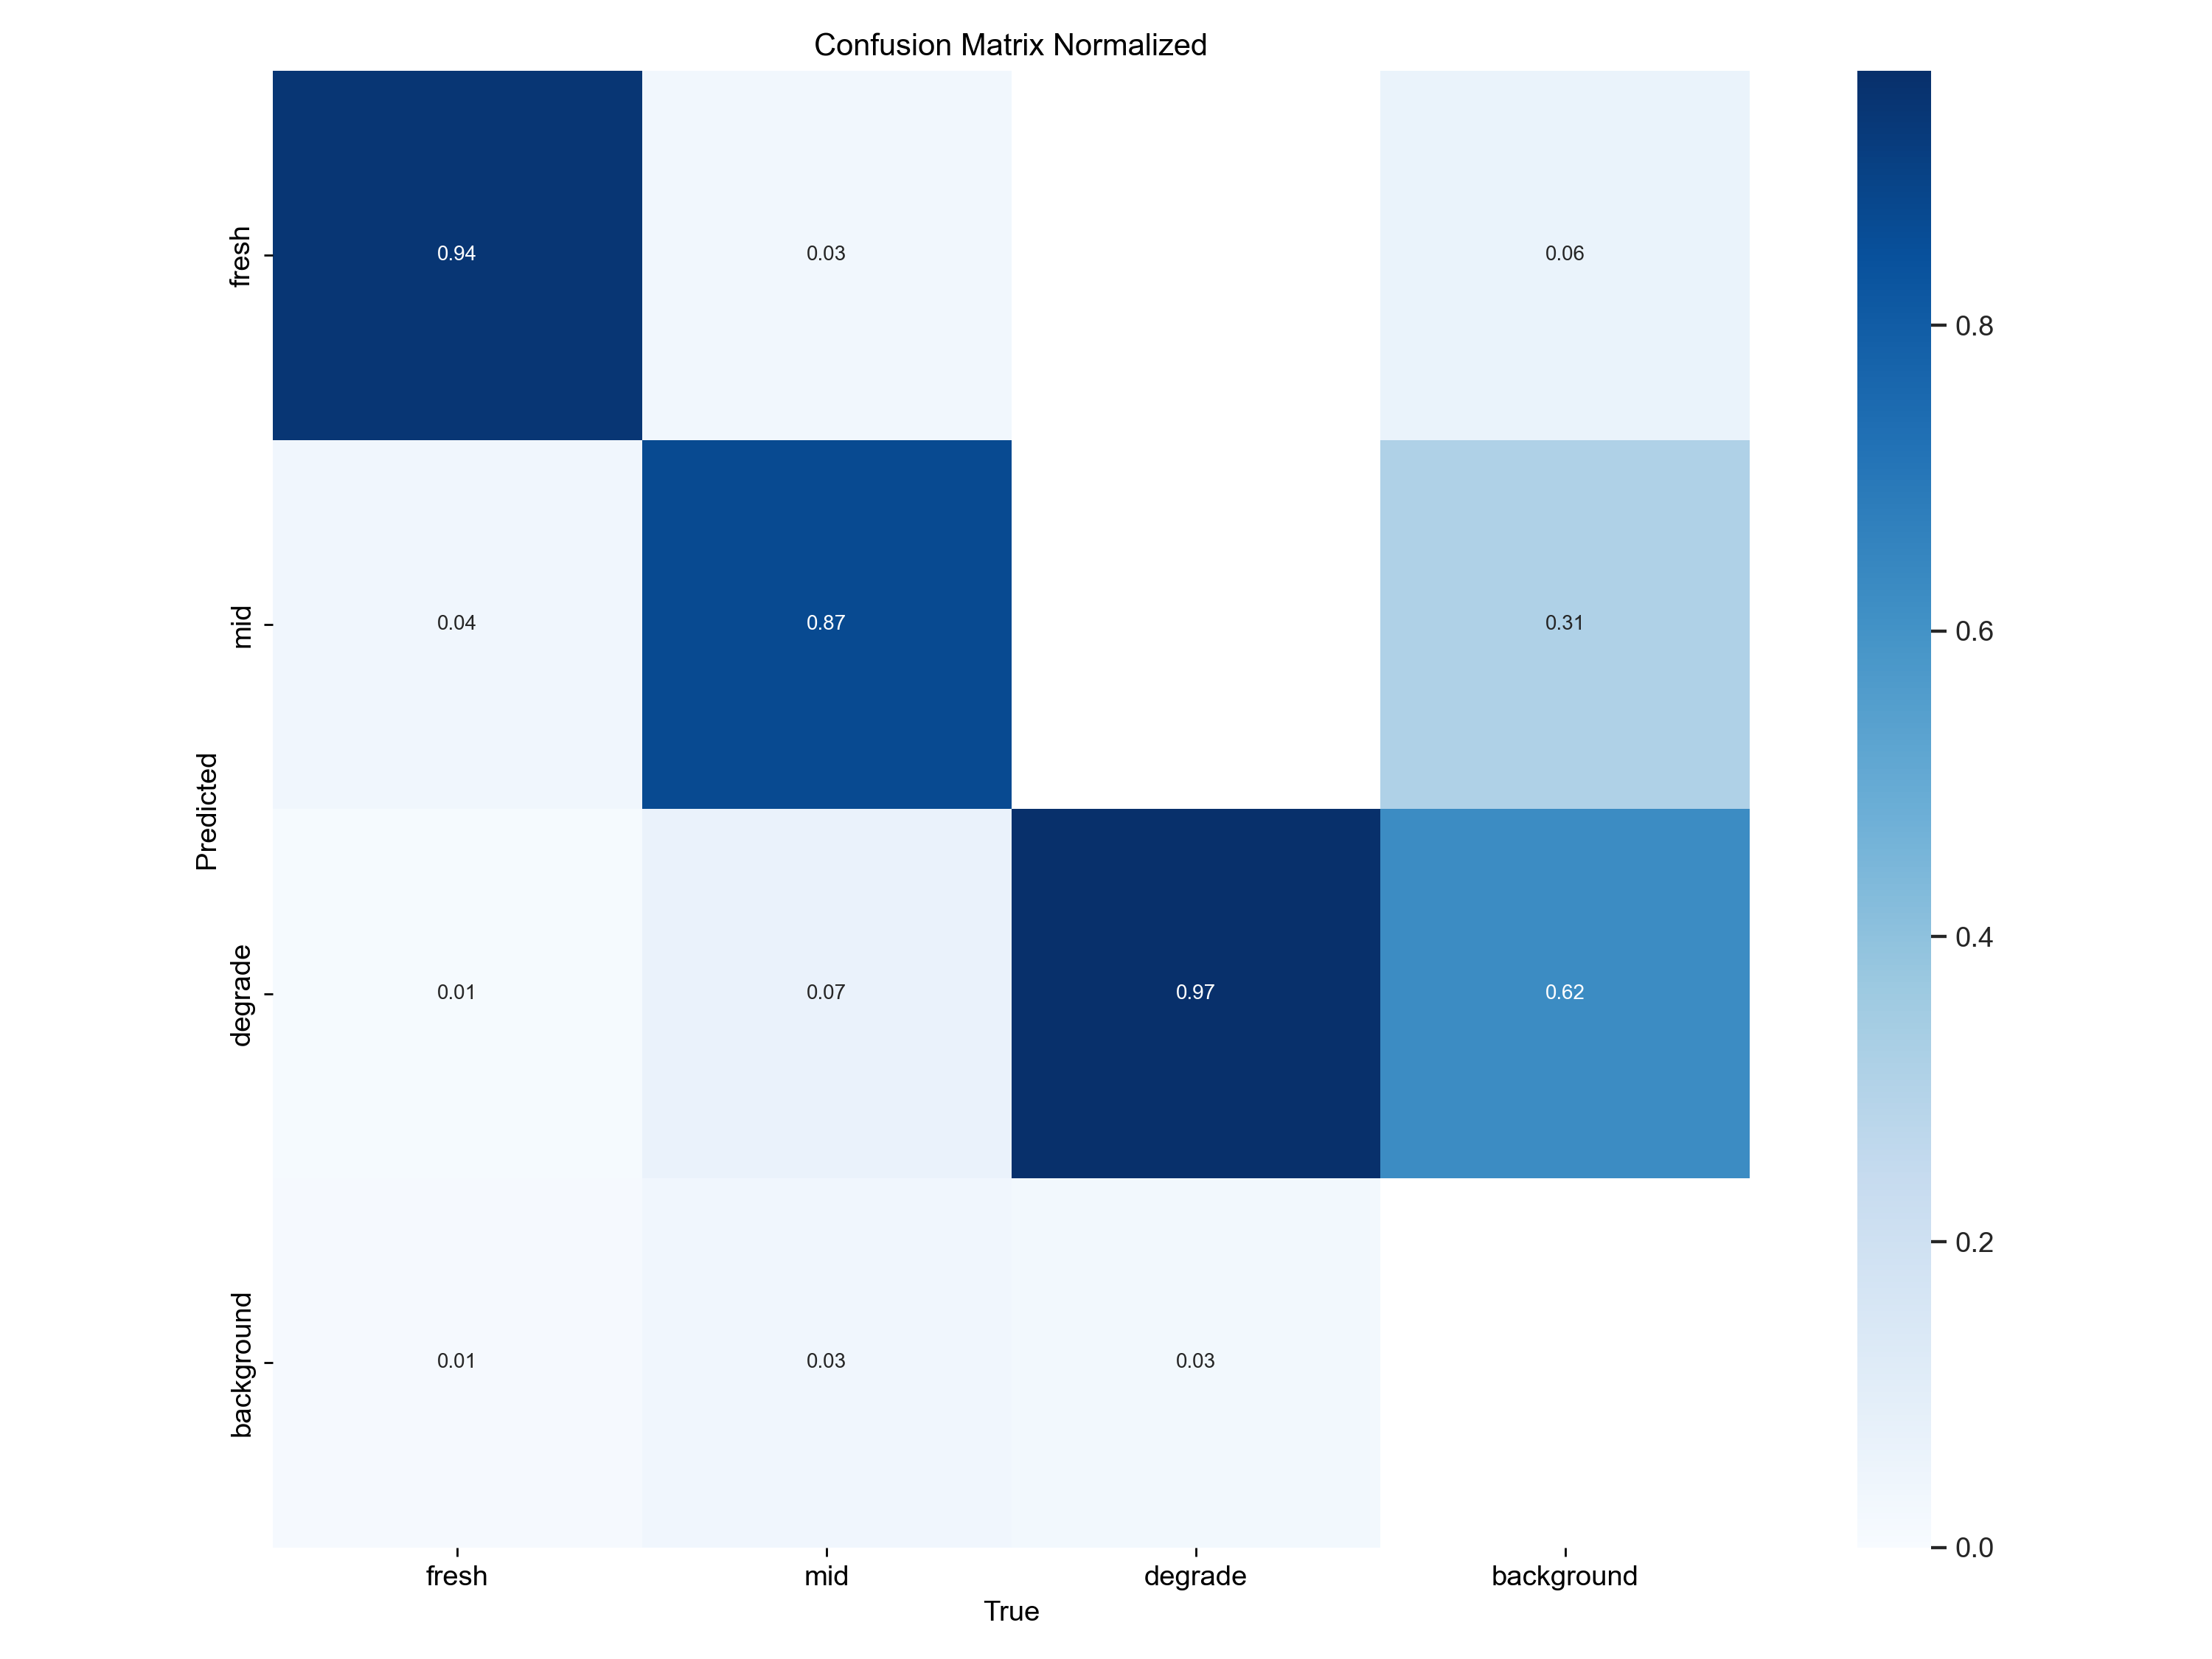

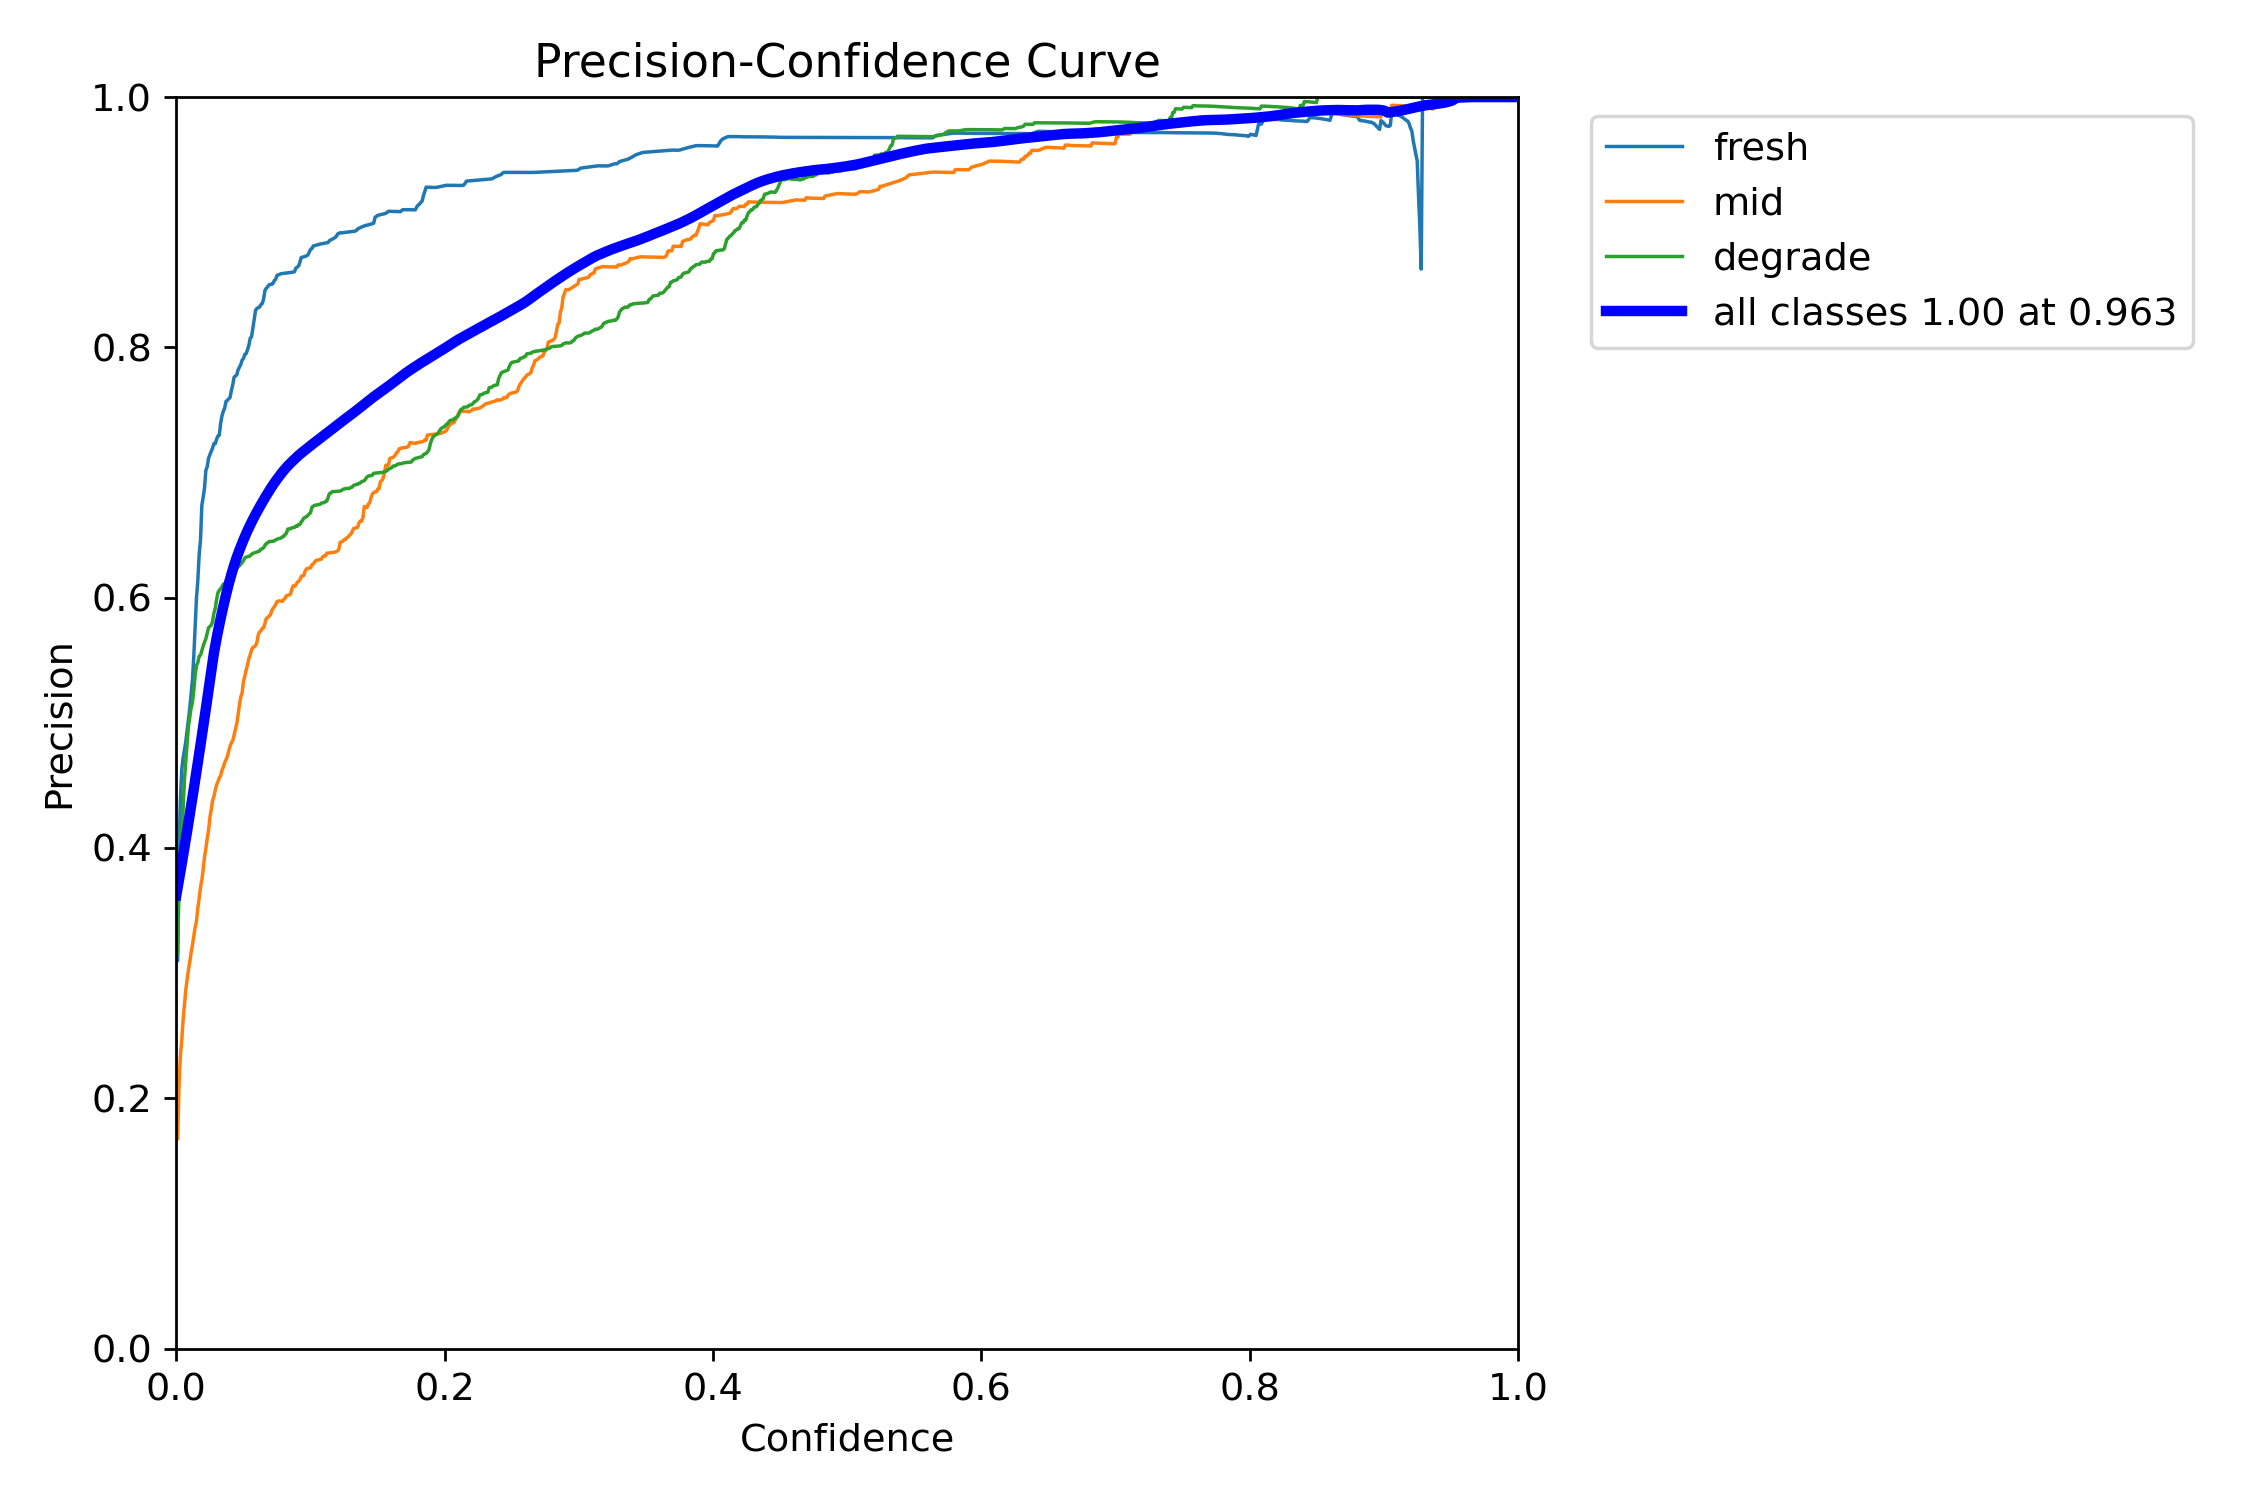

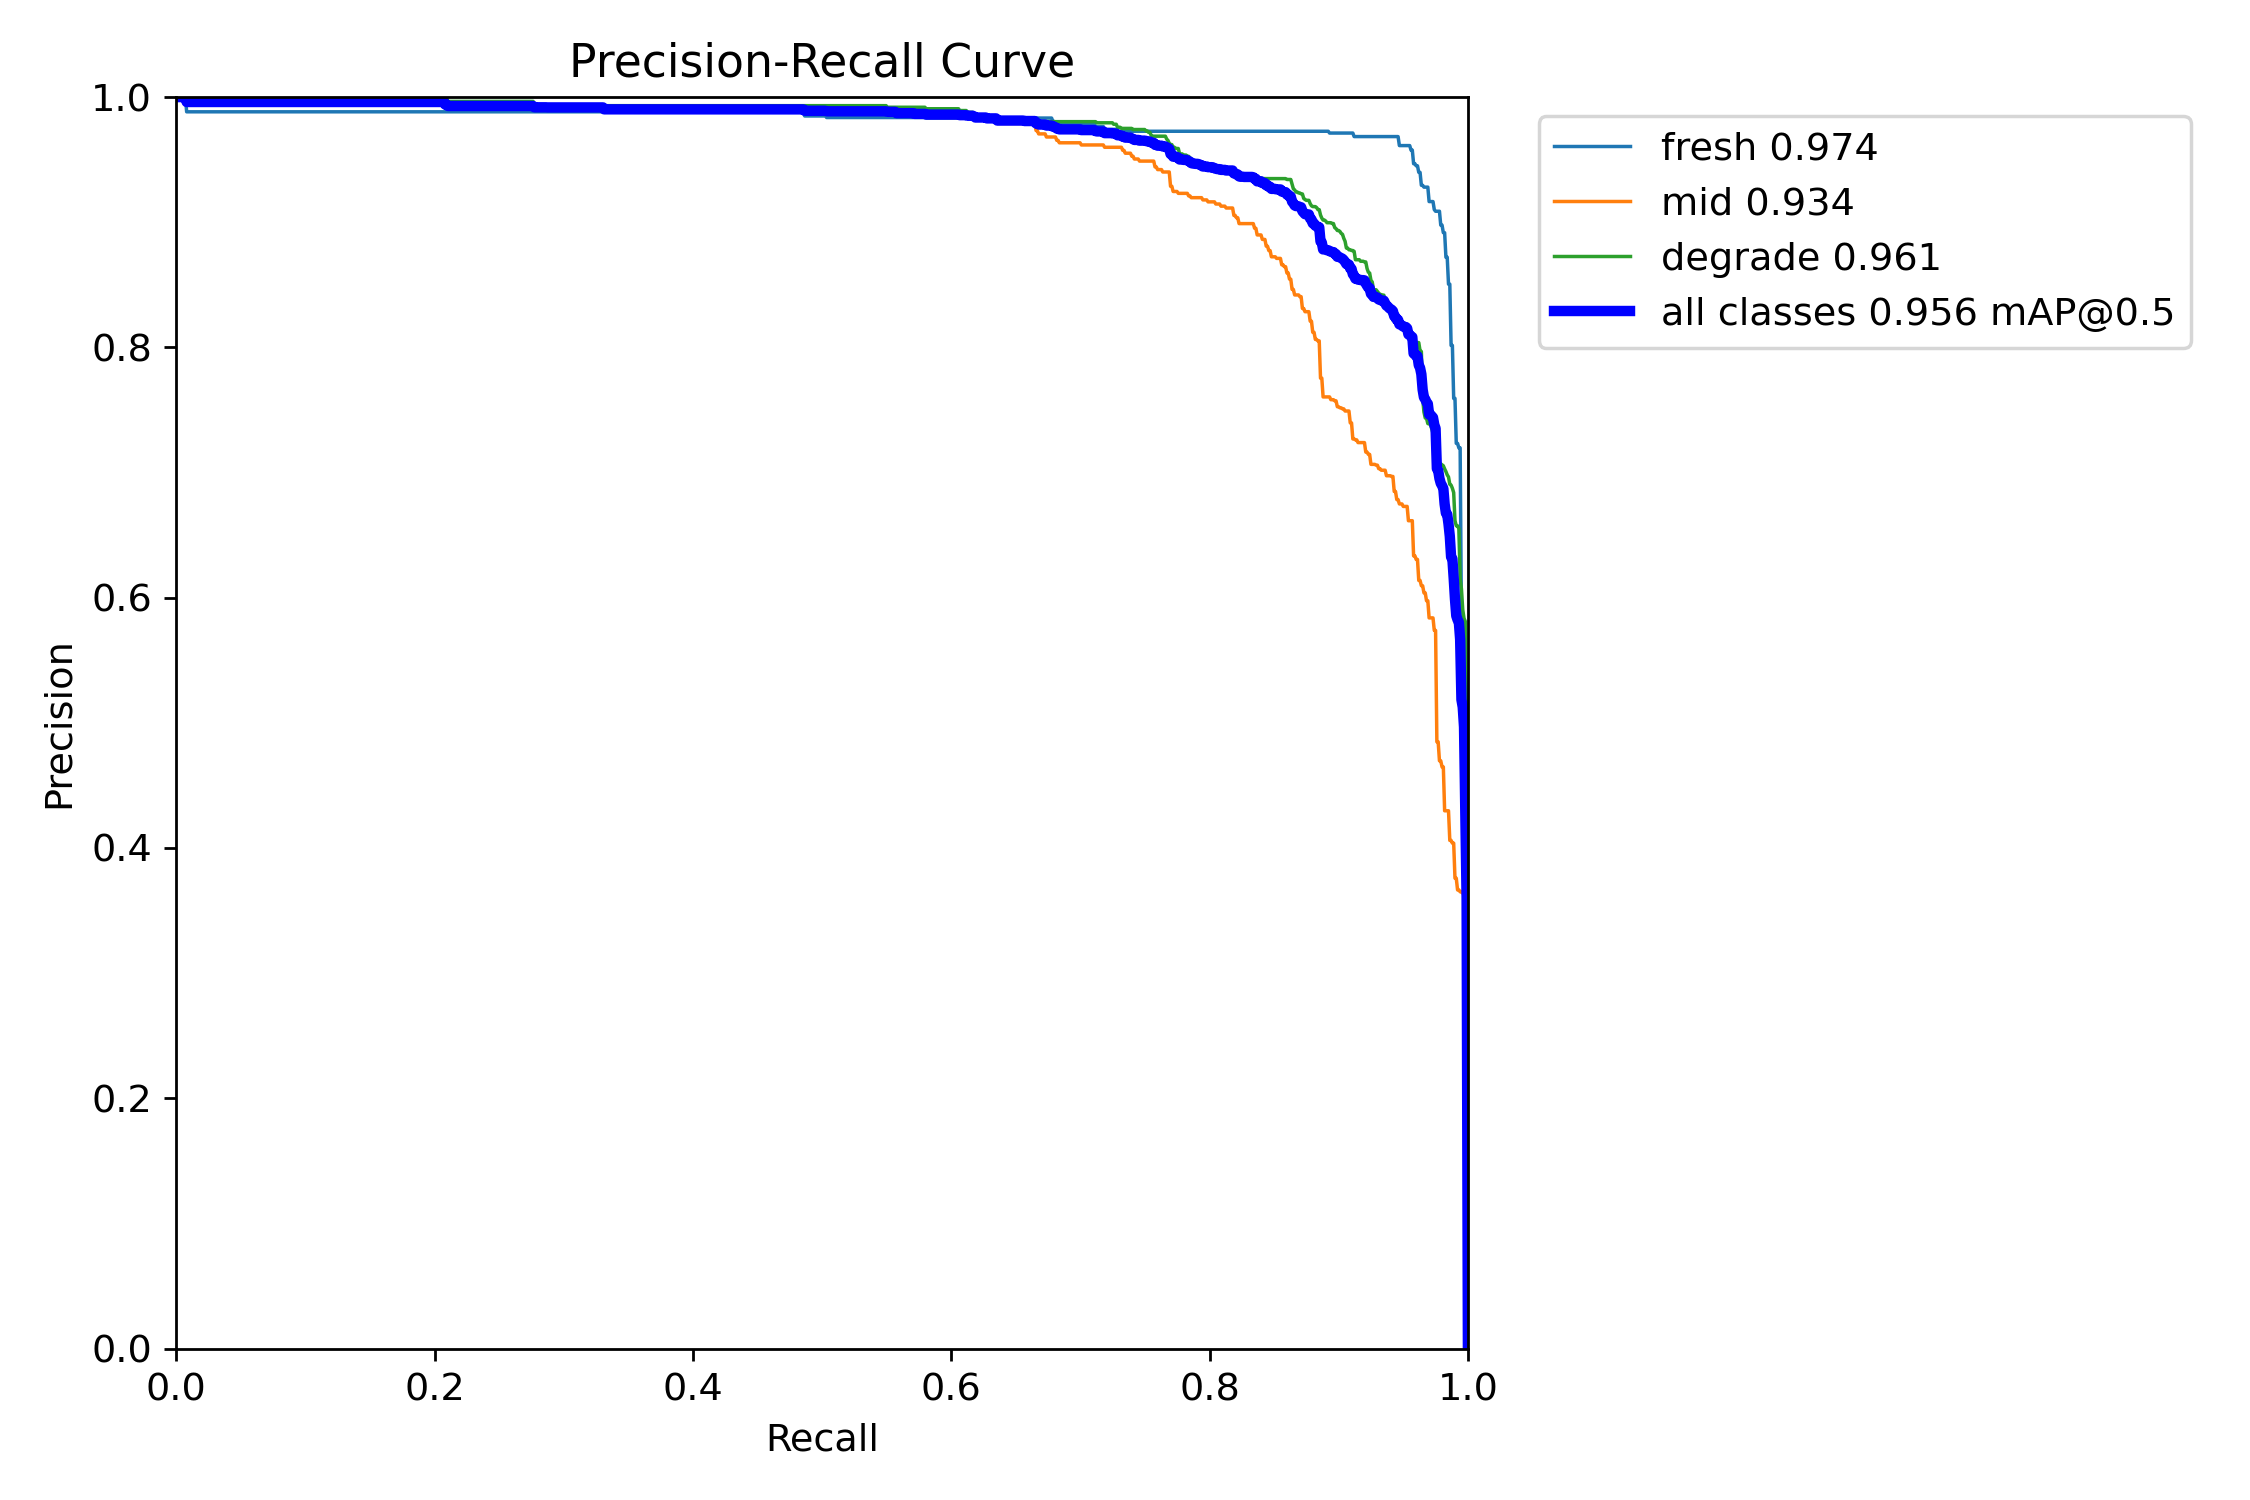

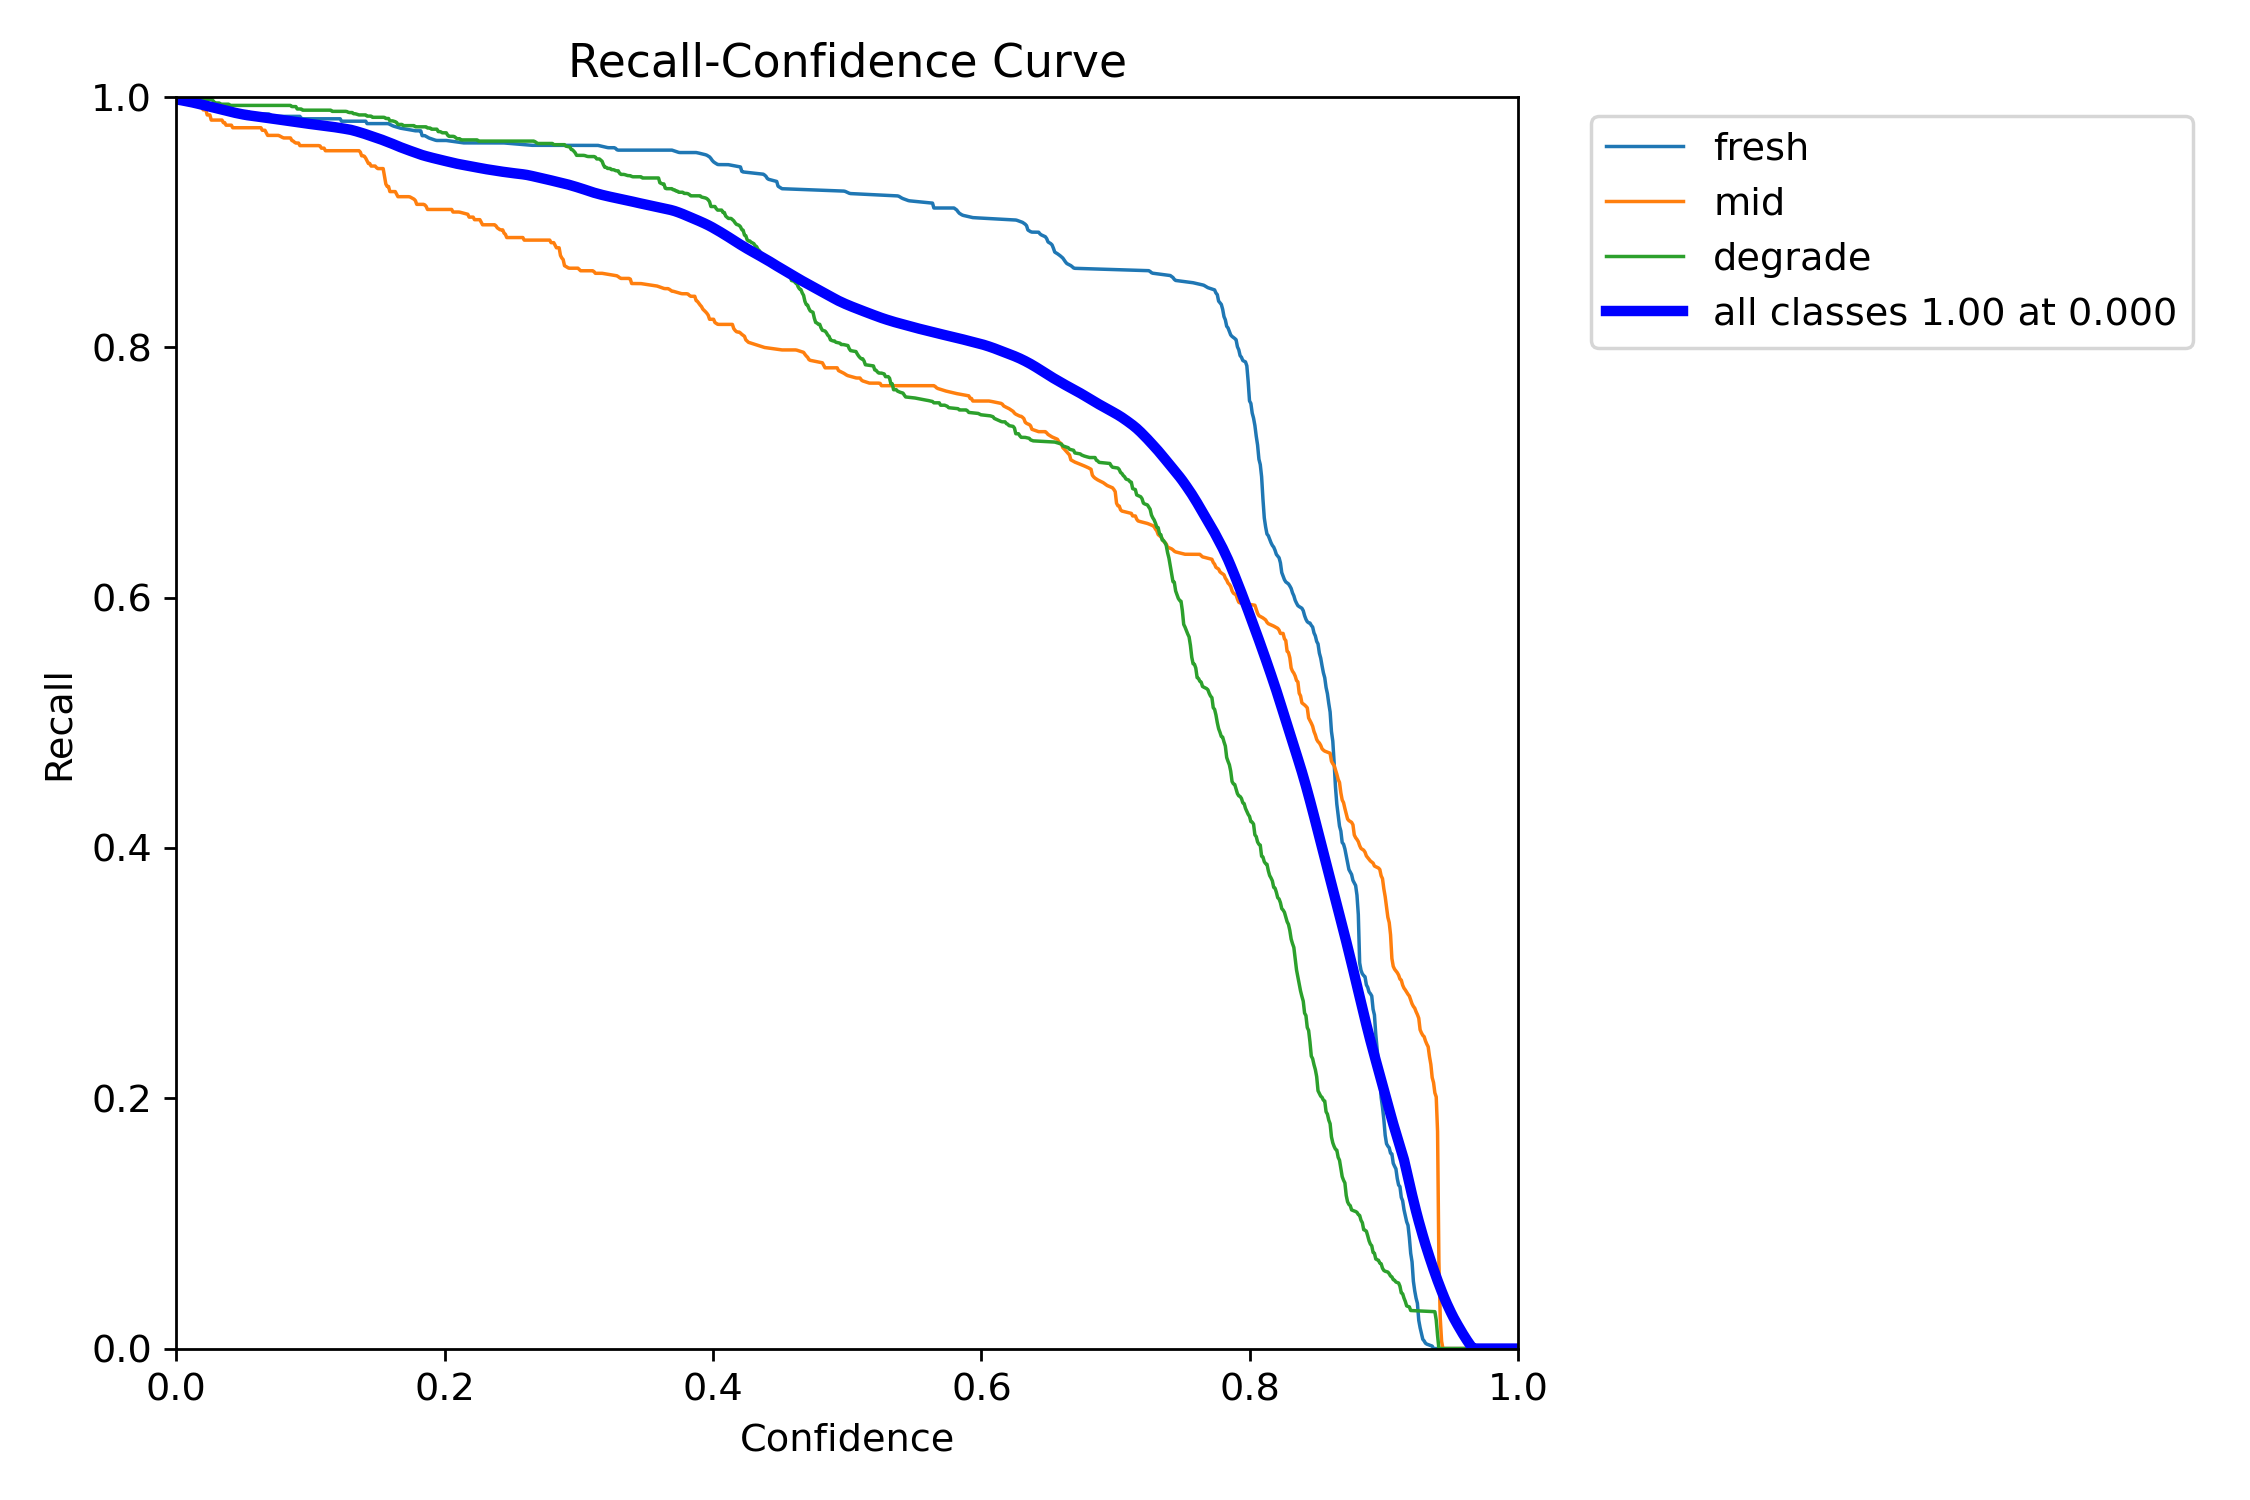

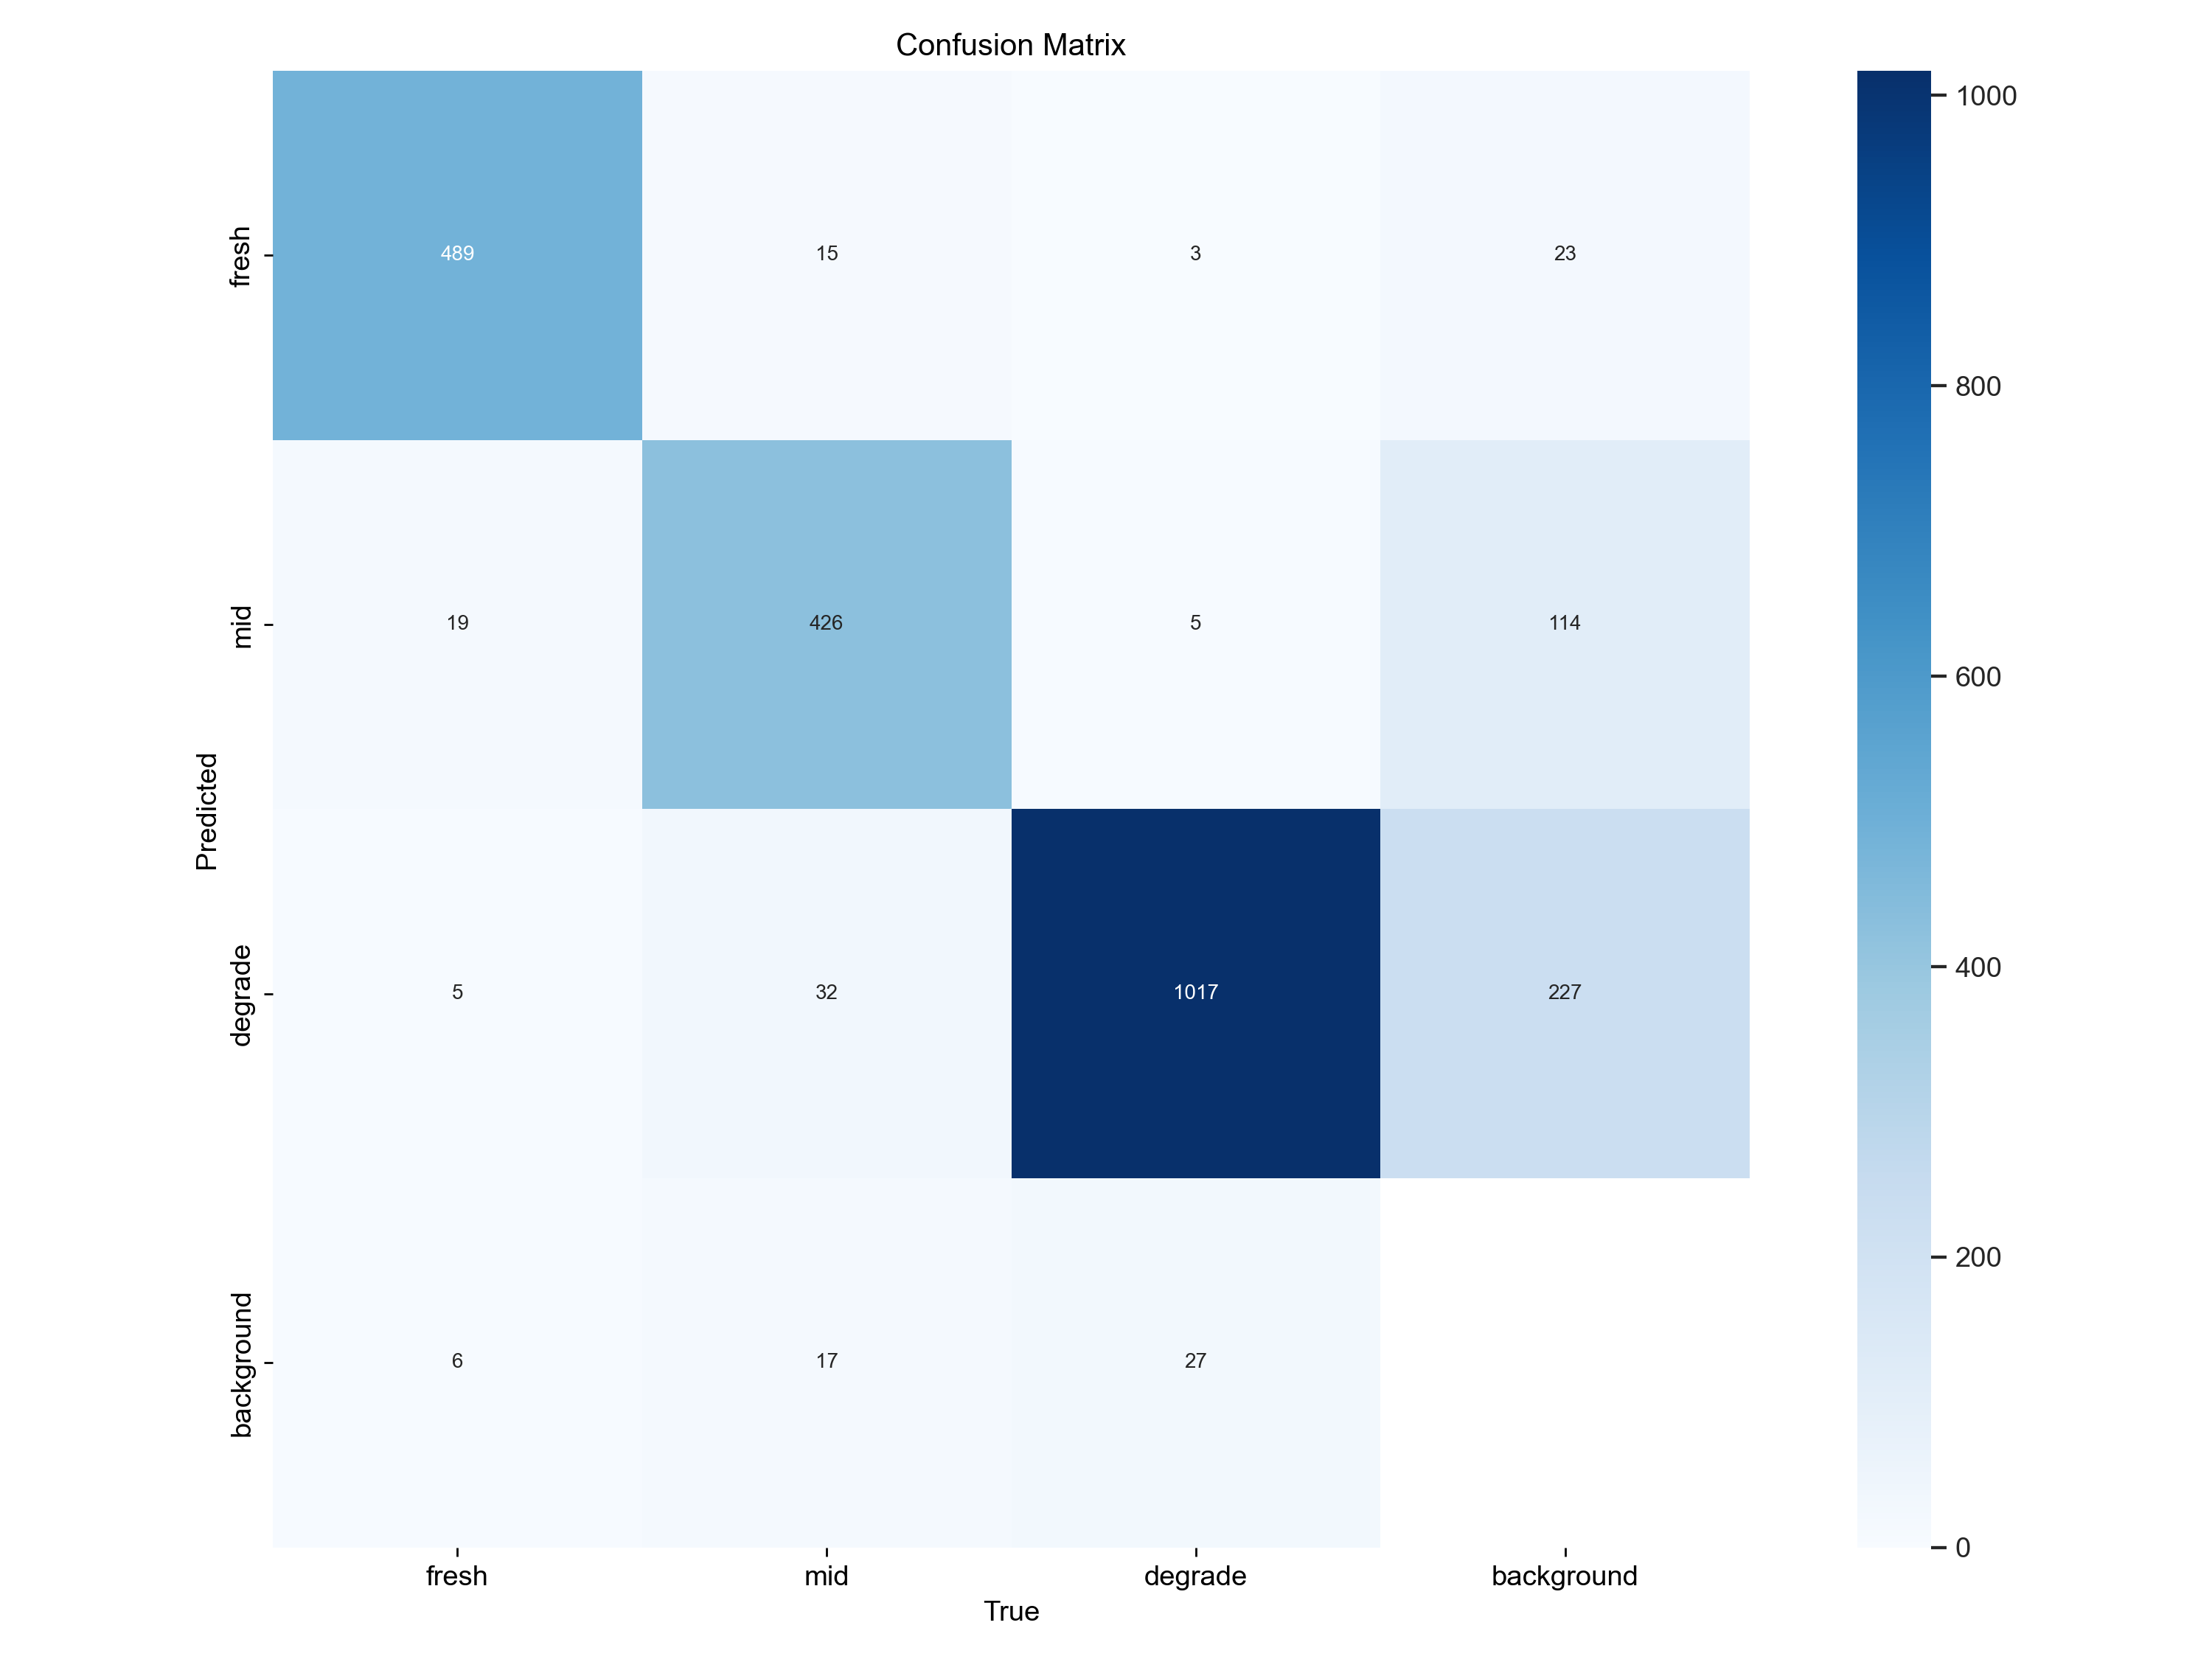

In [21]:
from IPython.display import Image, display

display(Image(filename='confusion_matrix_normalized.png', width=500))
display(Image(filename='P_curve.png', width=500))
display(Image(filename='PR_curve.png', width=500))
display(Image(filename='R_curve.png', width=500))
display(Image(filename='confusion_matrix.png', width=500))


The confusion matrix offers valuable insights into the performance of the YOLOv8 model for real-time fruit quality assessment using ethylene monitoring. Ideally, a perfect classification model would exhibit all high values along the diagonal, representing accurate predictions for each category (FRESH, MID, ROTTEN). However, our model's performance deviates from this ideal scenario, and a closer examination is warranted to identify strengths and weaknesses.

**Fresh Fruit Classification**

The model achieved a high true positive (TP) value of 469 for fresh fruits, indicating a strong ability to correctly classify unblemished fruits. This is further supported by the low false negative (FN) value of 23, signifying a minimal number of fresh fruits mistakenly categorized as rotten or mid-quality. These results are promising, as accurately identifying fresh produce is crucial for minimizing food waste and ensuring quality.




**Mid-Quality Fruit Classification**

The model's performance in classifying mid-quality fruits is acceptable but not without room for improvement. The true positive (TP) value of 426 suggests the model can effectively identify many mid-quality fruits. However, a relatively high false positive (FP) value of 114 indicates that some fresh fruits were misclassified as mid-quality. This overestimation of decay could potentially lead to unnecessary rejection of fresh produce. Investigating the types of misclassified fresh fruit images might provide clues for improving the model's accuracy in this category.


The Precision-Recall curve shows high precision values for all three classes—fresh, mid, and degrade. The precision scores for fresh, mid, and degrade classes are 0.974, 0.934, and 0.961, respectively, while the overall precision for all classes is 0.956. These high precision scores indicate that the YOLOv8 Nano model performs effectively across all three classes, demonstrating the model's capability to make accurate predictions. This analysis provides 


valuable insights for the research paper, reflecting the model's overall strong performance and its ability to differentiate between fresh, mid, and degrade objects effectively.
The YOLOv8 nano model was trained for 300 epochs. The training losses for bounding boxes, classification, and object detection remained relatively stable throughout the epochs. Precision, recall, and mean Average Precision (mAP) metrics showed consistent performance, indicating high accuracy in object detection. The model demonstrated robustness in both training and validation phases, with minimal fluctuations in loss values. Overall, the YOLOv8 nano model exhibited stable and reliable performance across the training epochs, validating its effectiveness in fruit quality.


In [22]:
from ultralytics import YOLO
import cv2

# Set paths
model_path = r'D:\Fruit life\fruits\model\runs\detect\train52\weights\best.pt'
video_path = r'D:\Fruit life\fruits\model\runs\detect\train52\Apple_life.mp4'
output_path = r'D:\Fruit life\fruits\model\runs\detect\train52\output_result.mp4'

# Load YOLOv8 model
model = YOLO(model_path)

# Load video using OpenCV
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference — pass a list of frames, not a single numpy array
    results = model([frame], imgsz=640, conf=0.25)

    # Plot results on the frame
    annotated_frame = results[0].plot()

    # Write to output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()
print(f"✅ Video saved at: {output_path}")



0: 640x384 (no detections), 28.5ms
Speed: 3.7ms preprocess, 28.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 26.4ms
Speed: 2.5ms preprocess, 26.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 27.6ms
Speed: 2.6ms preprocess, 27.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 26.4ms
Speed: 3.4ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 26.7ms
Speed: 2.5ms preprocess, 26.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 26.2ms
Speed: 2.8ms preprocess, 26.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 25.7ms
Speed: 2.5ms preprocess, 25.7ms i

In [23]:
from ultralytics import YOLO

# Load a model
model = YOLO(r'D:\Fruit life\Fruit life\train52\weights\last.pt')  # load a partially trained model

# Resume training
results = model.train(resume=True)

New https://pypi.org/project/ultralytics/8.3.140 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.139  Python-3.11.5 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, crop_fraction=1.0, cutmix=0.0, data=config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, label_smoothing=0.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=D:\Fruit life\Fruit life\train52\weights\last.pt, momentum=0.937, mosaic=0.0, mu

KeyboardInterrupt: 